Data Reporting - Storytelling Case

# Análise de dados da Netflix

Neste notebook apresentarei a análise exploratória dos meus dados na Neflix. O objetivo desse projeto é analisar quantidade de horas que utilizei, categorias, preferências e etc.


--- 
1 - A estrutura da análise está da seguinte forma:

- Carregamento dos dados 
- Tratamento e limpeza dos dados
- Exploração dos dados


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)

## Carregamento dos dados

In [37]:
df = pd.read_csv('/content/drive/MyDrive/atividade/projeto pessoal/ViewingActivity.csv')


In [38]:
df_history = pd.read_csv('/content/drive/MyDrive/atividade/projeto pessoal/SearchHistory.csv')

In [6]:
# df_history = df_history.loc[df_history['Profile Name'] == 'RAMON'].reset_index()

In [1]:
# df_history.head()

In [2]:
# df_history.info()

In [3]:
# from wordcloud import WordCloud, STOPWORDS
# import matplotlib.pyplot as plt
# text = df_history['Displayed Name'].values
# wordcloud = WordCloud(
#     width = 3000,
#     height = 2000,
#     background_color = 'black',
#     stopwords = STOPWORDS).generate(str(text))
# fig = plt.figure(
#     figsize = (10, 20))
# plt.imshow(wordcloud, interpolation = 'bilinear')
# plt.axis('off')
# plt.tight_layout(pad=0)
# plt.show()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11118 entries, 0 to 11117
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Profile Name             11118 non-null  object
 1   Start Time               11118 non-null  object
 2   Duration                 11118 non-null  object
 3   Attributes               5116 non-null   object
 4   Title                    11118 non-null  object
 5   Supplemental Video Type  1219 non-null   object
 6   Device Type              11118 non-null  object
 7   Bookmark                 11118 non-null  object
 8   Latest Bookmark          11118 non-null  object
 9   Country                  11118 non-null  object
dtypes: object(10)
memory usage: 868.7+ KB


Selecionando só meu usuário

In [40]:
data_netflix = df.loc[df['Profile Name'] == 'RAMON']

In [41]:
data_netflix.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
8034,RAMON,2021-07-17 03:44:02,00:24:48,Autoplayed: user action: User_Interaction;,Geração 30 e Poucos: Temporada 1: O elevador (...,NaN,AOC AOC 2016 MT5800 with no FRC Smart TV,00:30:06,00:30:06,BR (Brazil)
8035,RAMON,2021-07-17 03:18:19,00:25:38,NaN,Geração 30 e Poucos: Temporada 1: Mensagem na ...,NaN,AOC AOC 2016 MT5800 with no FRC Smart TV,00:25:43,00:25:43,BR (Brazil)
8036,RAMON,2021-07-17 02:56:22,00:21:05,Autoplayed: user action: User_Interaction;,Geração 30 e Poucos: Temporada 1: Come mai (Ep...,NaN,AOC AOC 2016 MT5800 with no FRC Smart TV,00:26:30,00:26:30,BR (Brazil)
8037,RAMON,2021-07-17 02:30:35,00:25:37,NaN,Geração 30 e Poucos: Temporada 1: O presente (...,NaN,AOC AOC 2016 MT5800 with no FRC Smart TV,00:25:42,00:25:42,BR (Brazil)
8038,RAMON,2021-07-17 02:22:48,00:07:37,Autoplayed: user action: User_Interaction;,Geração 30 e Poucos: Temporada 1: Fidelidade (...,NaN,AOC AOC 2016 MT5800 with no FRC Smart TV,00:24:07,00:24:07,BR (Brazil)


## Tratamento e limpeza dos dados 

In [42]:
data_netflix.reset_index(inplace=True)

In [43]:
data_netflix = data_netflix.drop(columns='index')

In [44]:
data_netflix.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,RAMON,2021-07-17 03:44:02,00:24:48,Autoplayed: user action: User_Interaction;,Geração 30 e Poucos: Temporada 1: O elevador (...,NaN,AOC AOC 2016 MT5800 with no FRC Smart TV,00:30:06,00:30:06,BR (Brazil)
1,RAMON,2021-07-17 03:18:19,00:25:38,NaN,Geração 30 e Poucos: Temporada 1: Mensagem na ...,NaN,AOC AOC 2016 MT5800 with no FRC Smart TV,00:25:43,00:25:43,BR (Brazil)
2,RAMON,2021-07-17 02:56:22,00:21:05,Autoplayed: user action: User_Interaction;,Geração 30 e Poucos: Temporada 1: Come mai (Ep...,NaN,AOC AOC 2016 MT5800 with no FRC Smart TV,00:26:30,00:26:30,BR (Brazil)
3,RAMON,2021-07-17 02:30:35,00:25:37,NaN,Geração 30 e Poucos: Temporada 1: O presente (...,NaN,AOC AOC 2016 MT5800 with no FRC Smart TV,00:25:42,00:25:42,BR (Brazil)
4,RAMON,2021-07-17 02:22:48,00:07:37,Autoplayed: user action: User_Interaction;,Geração 30 e Poucos: Temporada 1: Fidelidade (...,NaN,AOC AOC 2016 MT5800 with no FRC Smart TV,00:24:07,00:24:07,BR (Brazil)


In [45]:
#verificando  os tipos de video

data_netflix['Supplemental Video Type'].unique()

array([nan, 'TRAILER', 'HOOK', 'TEASER_TRAILER', 'PREVIEW'], dtype=object)

In [46]:
# Vamos limpar os dados que são Trailers, Hook , preview

df_f = data_netflix.loc[(data_netflix['Supplemental Video Type'] == 'TRAILER') | (data_netflix['Supplemental Video Type'] == 'HOOK') | (data_netflix['Supplemental Video Type'] == 'TEASER_TRAILER') | (data_netflix['Supplemental Video Type'] == 'PREVIEW')]
data_netflix = data_netflix.drop(df_f.index)

In [47]:
data_netflix

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,RAMON,2021-07-17 03:44:02,00:24:48,Autoplayed: user action: User_Interaction;,Geração 30 e Poucos: Temporada 1: O elevador (...,NaN,AOC AOC 2016 MT5800 with no FRC Smart TV,00:30:06,00:30:06,BR (Brazil)
1,RAMON,2021-07-17 03:18:19,00:25:38,NaN,Geração 30 e Poucos: Temporada 1: Mensagem na ...,NaN,AOC AOC 2016 MT5800 with no FRC Smart TV,00:25:43,00:25:43,BR (Brazil)
2,RAMON,2021-07-17 02:56:22,00:21:05,Autoplayed: user action: User_Interaction;,Geração 30 e Poucos: Temporada 1: Come mai (Ep...,NaN,AOC AOC 2016 MT5800 with no FRC Smart TV,00:26:30,00:26:30,BR (Brazil)
3,RAMON,2021-07-17 02:30:35,00:25:37,NaN,Geração 30 e Poucos: Temporada 1: O presente (...,NaN,AOC AOC 2016 MT5800 with no FRC Smart TV,00:25:42,00:25:42,BR (Brazil)
4,RAMON,2021-07-17 02:22:48,00:07:37,Autoplayed: user action: User_Interaction;,Geração 30 e Poucos: Temporada 1: Fidelidade (...,NaN,AOC AOC 2016 MT5800 with no FRC Smart TV,00:24:07,00:24:07,BR (Brazil)
...,...,...,...,...,...,...,...,...,...,...
1379,RAMON,2018-04-09 03:08:35,00:00:56,NaN,Um maluco no pedaço: Temporada 1: A vida do ma...,NaN,Android DefaultWidevineL3Phone Android Phone,00:03:27,Not latest view,BR (Brazil)
1380,RAMON,2018-04-01 00:45:33,01:45:52,Autoplayed: user action: User_Interaction;,Zerando a Vida,NaN,Edge (Cadmium),01:46:54,Not latest view,BR (Brazil)
1381,RAMON,2018-04-01 00:41:58,00:00:31,Autoplayed: user action: User_Interaction;,The Ridiculous 6,NaN,Edge (Cadmium),01:18:24,Not latest view,BR (Brazil)
1382,RAMON,2018-04-01 00:28:31,00:00:08,Autoplayed: user action: User_Interaction;,Zerando a Vida,NaN,Edge (Cadmium),00:00:08,Not latest view,BR (Brazil)


In [48]:
data_netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1235 entries, 0 to 1383
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Profile Name             1235 non-null   object
 1   Start Time               1235 non-null   object
 2   Duration                 1235 non-null   object
 3   Attributes               681 non-null    object
 4   Title                    1235 non-null   object
 5   Supplemental Video Type  0 non-null      object
 6   Device Type              1235 non-null   object
 7   Bookmark                 1235 non-null   object
 8   Latest Bookmark          1235 non-null   object
 9   Country                  1235 non-null   object
dtypes: object(10)
memory usage: 106.1+ KB


In [49]:
import pytz

In [50]:
data_netflix['Start Time'] = pd.to_datetime(data_netflix['Start Time'],utc=True)

In [51]:
# Convertendo para horário local 
brasil_timezone = pytz.timezone('Brazil/East')
data_netflix['Start Time'] = data_netflix['Start Time'].dt.tz_convert(brasil_timezone)

In [52]:
data_netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1235 entries, 0 to 1383
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype                      
---  ------                   --------------  -----                      
 0   Profile Name             1235 non-null   object                     
 1   Start Time               1235 non-null   datetime64[ns, Brazil/East]
 2   Duration                 1235 non-null   object                     
 3   Attributes               681 non-null    object                     
 4   Title                    1235 non-null   object                     
 5   Supplemental Video Type  0 non-null      object                     
 6   Device Type              1235 non-null   object                     
 7   Bookmark                 1235 non-null   object                     
 8   Latest Bookmark          1235 non-null   object                     
 9   Country                  1235 non-null   object                     
dtype

In [53]:
# Criando as colunas Ano,Mês, dia e dia da semana
data_netflix['Year'] = data_netflix['Start Time'].dt.year 
data_netflix['Month']  = data_netflix['Start Time'].dt.month_name()
data_netflix['Day'] = data_netflix['Start Time'].dt.day
data_netflix['Hour'] = data_netflix['Start Time'].dt.hour
data_netflix['Weekday'] = data_netflix['Start Time'].dt.day_name()

# Alterando o tipo do dado na coluna duração, inserindo a coluna duration (min)
data_netflix['Duration (min)'] = data_netflix['Duration'].str.split(':').map(
    lambda x: float(x[0]) * 60.0 + float(x[1]) + float(x[2]) / 60.0)

# Criando as colunas de duração(hora) e (min)
data_netflix['Duration (h)'] = data_netflix['Duration (min)']/60.0
data_netflix['Duration (days)'] = data_netflix['Duration (h)']/24.0


In [54]:
data_netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1235 entries, 0 to 1383
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype                      
---  ------                   --------------  -----                      
 0   Profile Name             1235 non-null   object                     
 1   Start Time               1235 non-null   datetime64[ns, Brazil/East]
 2   Duration                 1235 non-null   object                     
 3   Attributes               681 non-null    object                     
 4   Title                    1235 non-null   object                     
 5   Supplemental Video Type  0 non-null      object                     
 6   Device Type              1235 non-null   object                     
 7   Bookmark                 1235 non-null   object                     
 8   Latest Bookmark          1235 non-null   object                     
 9   Country                  1235 non-null   object                     
 10  

In [55]:
data_netflix.tail()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Year,Month,Day,Hour,Weekday,Duration (min),Duration (h),Duration (days)
1379,RAMON,2018-04-09 00:08:35-03:00,00:00:56,NaN,Um maluco no pedaço: Temporada 1: A vida do ma...,NaN,Android DefaultWidevineL3Phone Android Phone,00:03:27,Not latest view,BR (Brazil),2018,April,9,0,Monday,0.933333,0.015556,0.000648
1380,RAMON,2018-03-31 21:45:33-03:00,01:45:52,Autoplayed: user action: User_Interaction;,Zerando a Vida,NaN,Edge (Cadmium),01:46:54,Not latest view,BR (Brazil),2018,March,31,21,Saturday,105.866667,1.764444,0.073519
1381,RAMON,2018-03-31 21:41:58-03:00,00:00:31,Autoplayed: user action: User_Interaction;,The Ridiculous 6,NaN,Edge (Cadmium),01:18:24,Not latest view,BR (Brazil),2018,March,31,21,Saturday,0.516667,0.008611,0.000359
1382,RAMON,2018-03-31 21:28:31-03:00,00:00:08,Autoplayed: user action: User_Interaction;,Zerando a Vida,NaN,Edge (Cadmium),00:00:08,Not latest view,BR (Brazil),2018,March,31,21,Saturday,0.133333,0.002222,0.000093
1383,RAMON,2017-01-27 21:27:01-02:00,00:01:00,NaN,Um maluco no pedaço: Temporada 1: A vida do ma...,NaN,Chrome PC (Cadmium),00:02:15,Not latest view,BR (Brazil),2017,January,27,21,Friday,1.000000,0.016667,0.000694


In [56]:
data_netflix = data_netflix[['Profile Name','Start Time','Duration','Title', 'Device Type','Year','Month','Day','Hour','Weekday','Duration (min)','Duration (h)','Duration (days)']]

In [57]:
data_netflix.head()

,Profile Name,Start Time,Duration,Title,Device Type,Year,Month,Day,Hour,Weekday,Duration (min),Duration (h),Duration (days)
0,RAMON,2021-07-17 00:44:02-03:00,00:24:48,Geração 30 e Poucos: Temporada 1: O elevador (...,AOC AOC 2016 MT5800 with no FRC Smart TV,2021,July,17,0,Saturday,24.800000,0.413333,0.017222
1,RAMON,2021-07-17 00:18:19-03:00,00:25:38,Geração 30 e Poucos: Temporada 1: Mensagem na ...,AOC AOC 2016 MT5800 with no FRC Smart TV,2021,July,17,0,Saturday,25.633333,0.427222,0.017801
2,RAMON,2021-07-16 23:56:22-03:00,00:21:05,Geração 30 e Poucos: Temporada 1: Come mai (Ep...,AOC AOC 2016 MT5800 with no FRC Smart TV,2021,July,16,23,Friday,21.083333,0.351389,0.014641
3,RAMON,2021-07-16 23:30:35-03:00,00:25:37,Geração 30 e Poucos: Temporada 1: O presente (...,AOC AOC 2016 MT5800 with no FRC Smart TV,2021,July,16,23,Friday,25.616667,0.426944,0.017789
4,RAMON,2021-07-16 23:22:48-03:00,00:07:37,Geração 30 e Poucos: Temporada 1: Fidelidade (...,AOC AOC 2016 MT5800 with no FRC Smart TV,2021,July,16,23,Friday,7.616667,0.126944,0.005289


In [61]:
data_netflix.reset_index(inplace=True)

In [62]:
data_netflix = data_netflix.drop(columns='index')

In [63]:
data_netflix

,Profile Name,Start Time,Duration,Title,Device Type,Year,Month,Day,Hour,Weekday,Duration (min),Duration (h),Duration (days)
0,RAMON,2021-07-17 00:44:02-03:00,00:24:48,Geração 30 e Poucos: Temporada 1: O elevador (...,AOC AOC 2016 MT5800 with no FRC Smart TV,2021,July,17,0,Saturday,24.800000,0.413333,0.017222
1,RAMON,2021-07-17 00:18:19-03:00,00:25:38,Geração 30 e Poucos: Temporada 1: Mensagem na ...,AOC AOC 2016 MT5800 with no FRC Smart TV,2021,July,17,0,Saturday,25.633333,0.427222,0.017801
2,RAMON,2021-07-16 23:56:22-03:00,00:21:05,Geração 30 e Poucos: Temporada 1: Come mai (Ep...,AOC AOC 2016 MT5800 with no FRC Smart TV,2021,July,16,23,Friday,21.083333,0.351389,0.014641
3,RAMON,2021-07-16 23:30:35-03:00,00:25:37,Geração 30 e Poucos: Temporada 1: O presente (...,AOC AOC 2016 MT5800 with no FRC Smart TV,2021,July,16,23,Friday,25.616667,0.426944,0.017789
4,RAMON,2021-07-16 23:22:48-03:00,00:07:37,Geração 30 e Poucos: Temporada 1: Fidelidade (...,AOC AOC 2016 MT5800 with no FRC Smart TV,2021,July,16,23,Friday,7.616667,0.126944,0.005289
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,RAMON,2018-04-09 00:08:35-03:00,00:00:56,Um maluco no pedaço: Temporada 1: A vida do ma...,Android DefaultWidevineL3Phone Android Phone,2018,April,9,0,Monday,0.933333,0.015556,0.000648
1231,RAMON,2018-03-31 21:45:33-03:00,01:45:52,Zerando a Vida,Edge (Cadmium),2018,March,31,21,Saturday,105.866667,1.764444,0.073519
1232,RAMON,2018-03-31 21:41:58-03:00,00:00:31,The Ridiculous 6,Edge (Cadmium),2018,March,31,21,Saturday,0.516667,0.008611,0.000359
1233,RAMON,2018-03-31 21:28:31-03:00,00:00:08,Zerando a Vida,Edge (Cadmium),2018,March,31,21,Saturday,0.133333,0.002222,0.000093


In [64]:
data_netflix[['Title Name','Season', 'Episode']] = data_netflix['Title'].str.split(':',n=2, expand=True)


In [66]:
data_netflix = data_netflix.drop(columns='Title')

In [68]:
data_netflix.head()

,Profile Name,Start Time,Duration,Device Type,Year,Month,Day,Hour,Weekday,Duration (min),Duration (h),Duration (days),Title Name,Season,Episode
0,RAMON,2021-07-17 00:44:02-03:00,00:24:48,AOC AOC 2016 MT5800 with no FRC Smart TV,2021,July,17,0,Saturday,24.800000,0.413333,0.017222,Geração 30 e Poucos,Temporada 1,O elevador (Episódio 8)
1,RAMON,2021-07-17 00:18:19-03:00,00:25:38,AOC AOC 2016 MT5800 with no FRC Smart TV,2021,July,17,0,Saturday,25.633333,0.427222,0.017801,Geração 30 e Poucos,Temporada 1,Mensagem na garrafa (Episódio 7)
2,RAMON,2021-07-16 23:56:22-03:00,00:21:05,AOC AOC 2016 MT5800 with no FRC Smart TV,2021,July,16,23,Friday,21.083333,0.351389,0.014641,Geração 30 e Poucos,Temporada 1,Come mai (Episódio 6)
3,RAMON,2021-07-16 23:30:35-03:00,00:25:37,AOC AOC 2016 MT5800 with no FRC Smart TV,2021,July,16,23,Friday,25.616667,0.426944,0.017789,Geração 30 e Poucos,Temporada 1,O presente (Episódio 5)
4,RAMON,2021-07-16 23:22:48-03:00,00:07:37,AOC AOC 2016 MT5800 with no FRC Smart TV,2021,July,16,23,Friday,7.616667,0.126944,0.005289,Geração 30 e Poucos,Temporada 1,Fidelidade (Episódio 4)


In [69]:
data_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype                      
---  ------           --------------  -----                      
 0   Profile Name     1235 non-null   object                     
 1   Start Time       1235 non-null   datetime64[ns, Brazil/East]
 2   Duration         1235 non-null   object                     
 3   Device Type      1235 non-null   object                     
 4   Year             1235 non-null   int64                      
 5   Month            1235 non-null   object                     
 6   Day              1235 non-null   int64                      
 7   Hour             1235 non-null   int64                      
 8   Weekday          1235 non-null   object                     
 9   Duration (min)   1235 non-null   float64                    
 10  Duration (h)     1235 non-null   float64                    
 11  Duration (days)  1235 non-null

In [70]:
#Vamos verificar se é FIlme ou Serie
#Para isso 
data_netflix['Type'] = data_netflix.apply(lambda x:'Filme' if pd.isnull(x['Episode']) else 'Serie' , axis=1)


In [71]:
data_netflix.head()

,Profile Name,Start Time,Duration,Device Type,Year,Month,Day,Hour,Weekday,Duration (min),Duration (h),Duration (days),Title Name,Season,Episode,Type
0,RAMON,2021-07-17 00:44:02-03:00,00:24:48,AOC AOC 2016 MT5800 with no FRC Smart TV,2021,July,17,0,Saturday,24.800000,0.413333,0.017222,Geração 30 e Poucos,Temporada 1,O elevador (Episódio 8),Serie
1,RAMON,2021-07-17 00:18:19-03:00,00:25:38,AOC AOC 2016 MT5800 with no FRC Smart TV,2021,July,17,0,Saturday,25.633333,0.427222,0.017801,Geração 30 e Poucos,Temporada 1,Mensagem na garrafa (Episódio 7),Serie
2,RAMON,2021-07-16 23:56:22-03:00,00:21:05,AOC AOC 2016 MT5800 with no FRC Smart TV,2021,July,16,23,Friday,21.083333,0.351389,0.014641,Geração 30 e Poucos,Temporada 1,Come mai (Episódio 6),Serie
3,RAMON,2021-07-16 23:30:35-03:00,00:25:37,AOC AOC 2016 MT5800 with no FRC Smart TV,2021,July,16,23,Friday,25.616667,0.426944,0.017789,Geração 30 e Poucos,Temporada 1,O presente (Episódio 5),Serie
4,RAMON,2021-07-16 23:22:48-03:00,00:07:37,AOC AOC 2016 MT5800 with no FRC Smart TV,2021,July,16,23,Friday,7.616667,0.126944,0.005289,Geração 30 e Poucos,Temporada 1,Fidelidade (Episódio 4),Serie


## Exploração dos Dados 

In [72]:
# Usuario
usuario = pd.DataFrame(data_netflix['Profile Name'].unique())
usuario.columns = ['usuario']
usuario

,usuario
0,RAMON


In [74]:
#Horas assistidas Netfli

horas_assistidas = data_netflix['Duration (h)'].sum()

print(f'O tempo total de Filmes e séries assistidas são mais de {int(horas_assistidas)} horas')

O tempo total de Filmes e séries assistidas são mais de 464 horas


In [76]:
# Em dias isso da aproximadamente

dias_assistidos = data_netflix['Duration (days)'].sum()
print(f'O tempo total de Filmes e séries assistidas em dias são: {int(dias_assistidos)} dias seguidos')

O tempo total de Filmes e séries assistidas em dias são: 19 dias seguidos


In [77]:
## Em minutos 

minutos_assistidos = data_netflix['Duration (min)'].sum()
print(f'O tempo total de Filmes e séries assistidas são mais de {int(minutos_assistidos)} minutos')

O tempo total de Filmes e séries assistidas são mais de 27880 minutos


In [79]:
# Tempo total em series

series_tempo = data_netflix.loc[data_netflix['Type'] == 'Serie']
series_tempo = series_tempo['Duration (h)'].sum()
print(f'O tempo total de séries assistidas são mais de {int(series_tempo)} horas')

O tempo total de séries assistidas são mais de 169 horas


In [80]:
# Tempo total e filmes 

filme_tempo = data_netflix.loc[data_netflix['Type'] == 'Filme']
filme_tempo = filme_tempo['Duration (h)'].sum()
print(f'O tempo total de filmes assistidos são mais de {int(filme_tempo)} horas')

O tempo total de filmes assistidos são mais de 295 horas


In [81]:
# Quantas tipos de Series diferentes

serie = data_netflix.loc[data_netflix['Type'] == 'Serie']
serie = len(serie['Title Name'].unique().tolist())
print(f'{serie} séries assistidas')

129 séries assistidas


In [82]:
filme = data_netflix.loc[data_netflix['Type'] == 'Filme']
filme = len(filme['Title Name'].unique().tolist())
print(f'{filme} filmes assistidos')

275 filmes assistidos


In [83]:
#Tippos de aparelhos 
aparelho = pd.DataFrame(data_netflix['Device Type'].unique())
aparelho.columns = ['Device Type']
aparelho


,Device Type
0,AOC AOC 2016 MT5800 with no FRC Smart TV
1,Netflix Opera Other
2,Samsung CE 2019 Muse-L UHD TV Smart TV
3,Samsung 2015 NT14M DTV Smart TV
4,Chrome PC (Cadmium)
5,DefaultWidevineAndroidTablets
6,Android DefaultWidevineL3Phone Android Phone
7,Edge (Cadmium)


Text(0, 0.5, 'Horas')

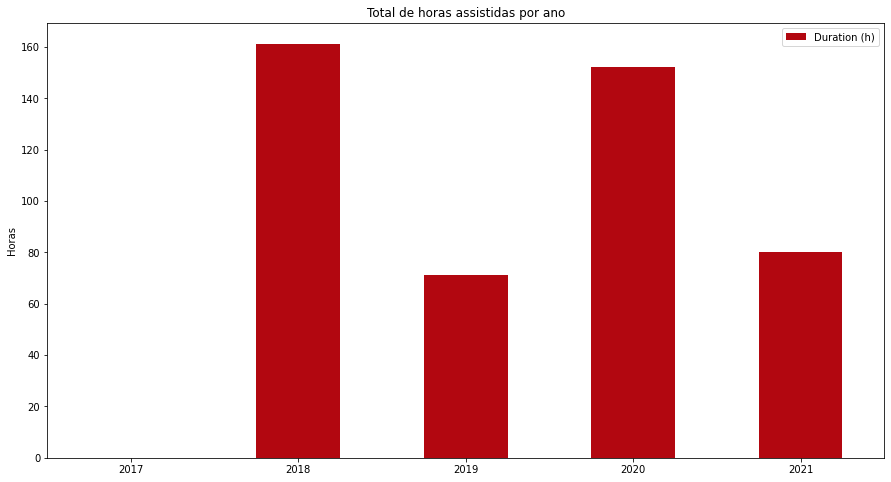

In [86]:
# Morei em uma republica em 2018. Então como boa parte estava sozinho, ficava assistindo séries quando não estava estudando 
data_netflix.groupby(['Year']).agg({'Duration (h)':'sum'}).plot(kind='bar',color='#B20710',rot=0)
plt.title("Total de horas assistidas por ano")
plt.xlabel("")
plt.ylabel("Horas")


Text(0, 0.5, 'Horas')

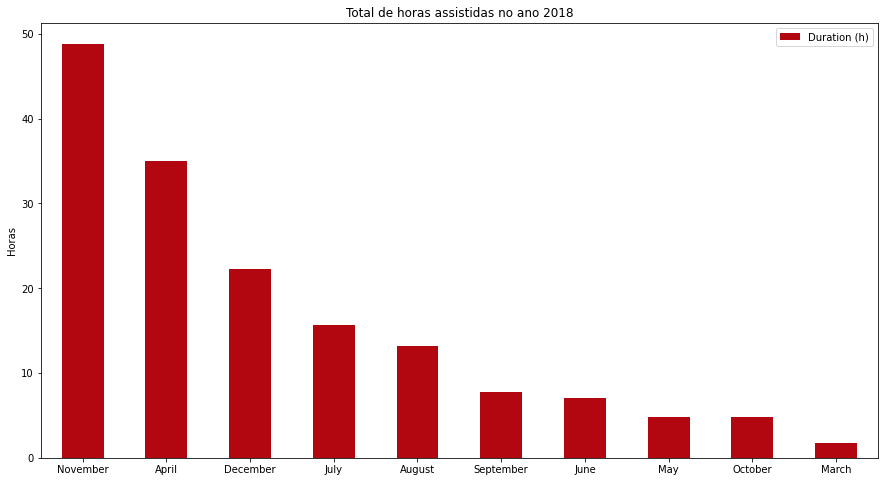

In [87]:

data_2018 = data_netflix.loc[data_netflix['Year'] == 2018]
data_2018.groupby('Month').agg({'Duration (h)':'sum'}).sort_values(by='Duration (h)',ascending=False).plot(kind='bar',color='#B20710',rot=0)
plt.title("Total de horas assistidas no ano 2018")
plt.xlabel("")
plt.ylabel("Horas")



Text(0, 0.5, '')

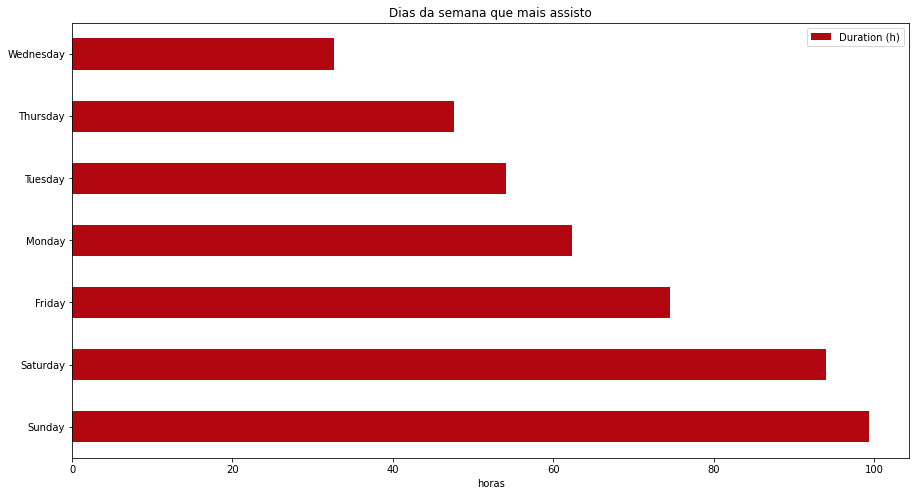

In [90]:
# Dias da semana que mais assisto

data_semana = data_netflix.groupby('Weekday').agg({'Duration (h)':'sum'}).sort_values(by='Duration (h)',ascending=False)
data_semana.plot(kind='barh',color='#B20710')
plt.title("Dias da semana que mais assisto")
plt.xlabel("horas")
plt.ylabel("")


Text(0, 0.5, 'Horas')

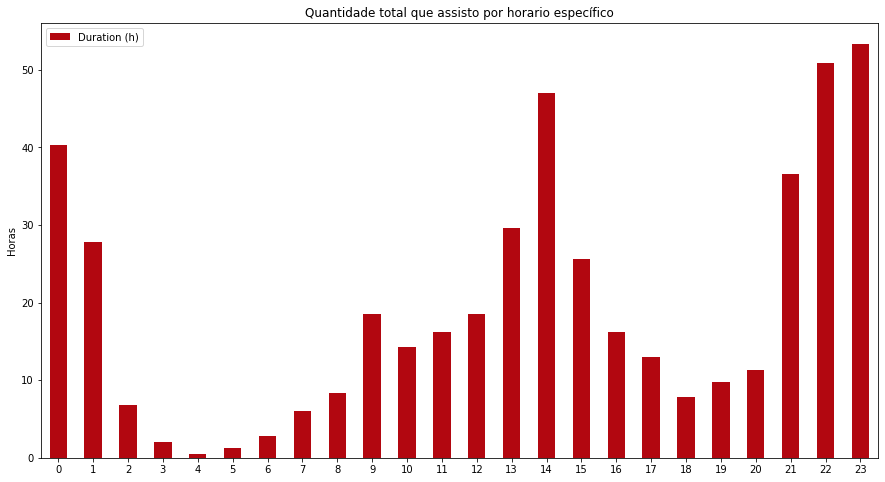

In [91]:
# Quantidade de horas que assisto por horario

data_netflix.groupby('Hour').agg({'Duration (h)':'sum'}).plot(kind='bar',color='#B20710',rot=0)
plt.title("Quantidade total que assisto por horario específico")
plt.xlabel("")
plt.ylabel("Horas")


Text(10.779492187500004, 0.5, 'Horas')

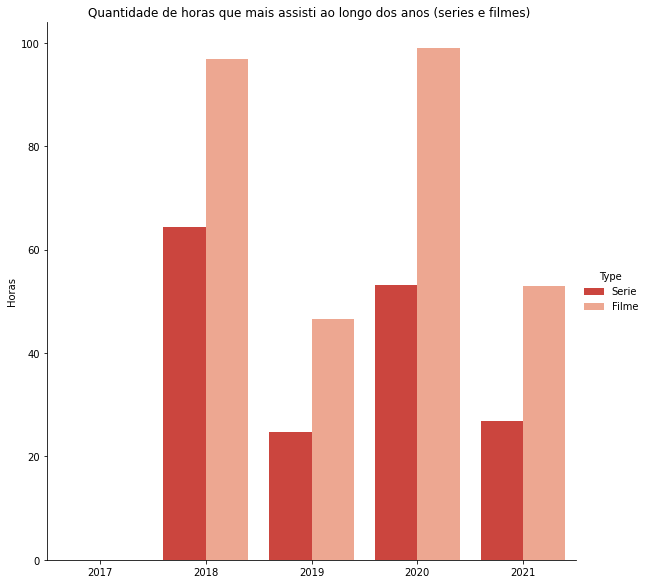

In [92]:
#Quantidade de horas que mais assisti ao longo dos anos series e filmes 

data_serie_filme = data_netflix.groupby(['Year','Type']).agg({'Duration (h)':'sum'}).reset_index()
sns.catplot(x="Year", y="Duration (h)", kind='bar', hue="Type", palette="Reds_r",data=data_serie_filme, height=8)

plt.title("Quantidade de horas que mais assisti ao longo dos anos (series e filmes) ")
plt.xlabel("")
plt.ylabel("Horas")

Text(10.101323784722219, 0.5, 'Horas')

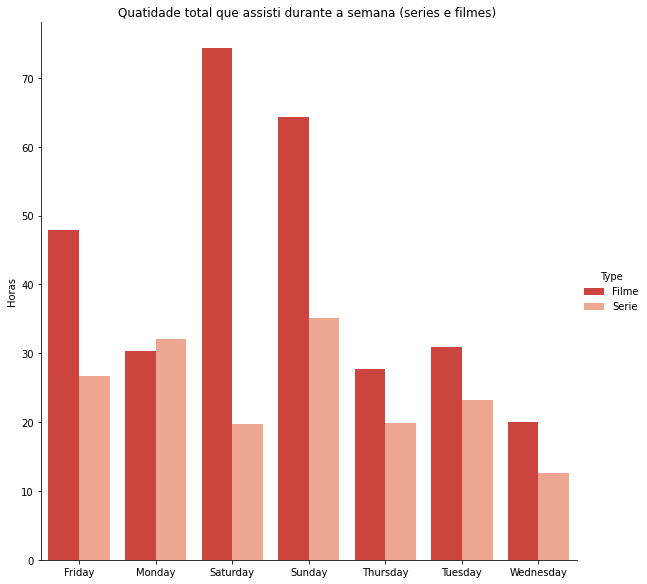

In [93]:
#Quatidade total que assisti durante a semana (series e filmes)

data_serie_filme_semana = data_netflix.groupby(['Weekday','Type']).agg({'Duration (h)':'sum'}).reset_index()

sns.catplot(x="Weekday", y="Duration (h)", kind='bar', hue="Type", palette="Reds_r",data=data_serie_filme_semana, height=8)
plt.title("Quatidade total que assisti durante a semana (series e filmes) ")
plt.xlabel("")
plt.ylabel("Horas")

In [95]:
# Series que mais assisti

series_assistidas = data_netflix.loc[data_netflix['Type'] == 'Serie']
series_assistidas['Title Name'].value_counts().head(20)

#Meu supreendeu, pois não assisto naruto. Percebi que meu irmão usava minha conta. Isso foi uma baita surpresa pra mim pois ele também tem conta. 



Naruto                                        233
Naruto Shippuden                              116
Pokémon - A Série                              59
Os Cavaleiros do Zodíaco - The Lost Canvas     31
ONE PIECE                                      27
Henry Danger                                   26
A Casa da Raven                                26
The Umbrella Academy                           20
Como vender drogas online (rápido)             13
Titãs                                          13
Samurai X                                      11
One Day at a Time                              11
Geração 30 e Poucos                            10
Troia                                          10
The 100                                         8
A Era dos Dados                                 8
100 Humanos                                     8
Bob Esponja                                     7
13 Reasons Why                                  7
Lupin                                           6


In [96]:
filme_assistidas = data_netflix.loc[data_netflix['Type'] == 'Filme']
filme_assistidas['Title Name'].value_counts().head(20)

Bird Box                                      8
Mama                                          5
Crônicas de Natal                             5
Pixels                                        5
Para Todos os Garotos que Já Amei             5
Frozen - Uma Aventura Congelante              5
Guardiões da Galáxia                          4
O Pacote                                      4
Pokémon o filme - Hoopa e o Duelo Lendário    4
Lá Vêm os Pais                                4
Zerando a Vida                                4
As aventuras de Peabody e Sherman             4
The Ridiculous 6                              3
Trocando os pés                               3
As Tartarugas Ninja                           3
Esquadrão Trovão                              3
O Dilema das Redes                            3
Mistério no Mediterrâneo                      3
Power                                         3
Todo Mundo em Pânico 2                        3
Name: Title Name, dtype: int64

Text(0, 0.5, '')

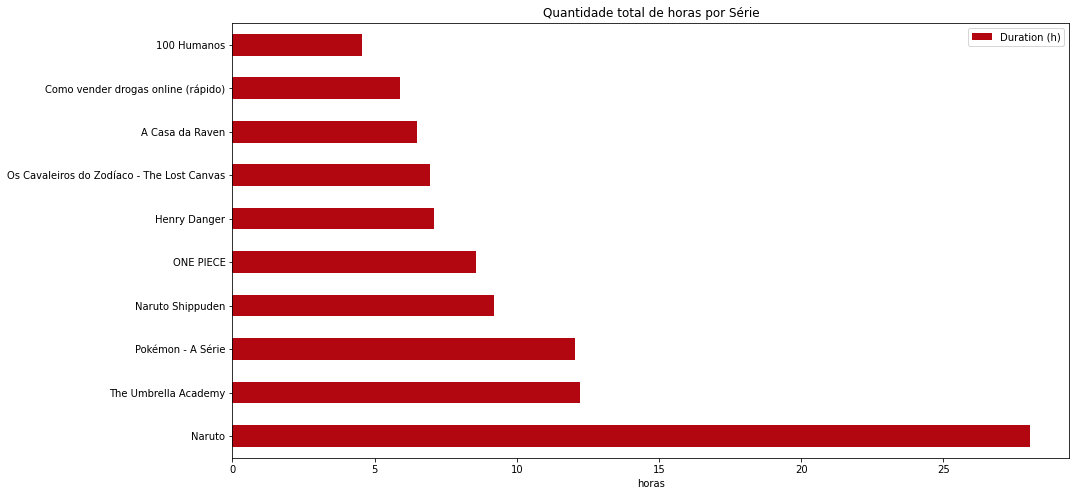

In [99]:
# Horas de cada serie


series_assistidas_horas = data_netflix.loc[data_netflix['Type'] == 'Serie']
series_assistidas_horas = series_assistidas_horas.groupby(['Title Name']).agg({'Duration (h)':'sum'}).sort_values(by='Duration (h)',ascending=False).head(10)
series_assistidas_horas.plot(kind='barh',color='#B20710')
plt.title("Quantidade total de horas por Série")
plt.xlabel("horas")
plt.ylabel("")


Text(0, 0.5, '')

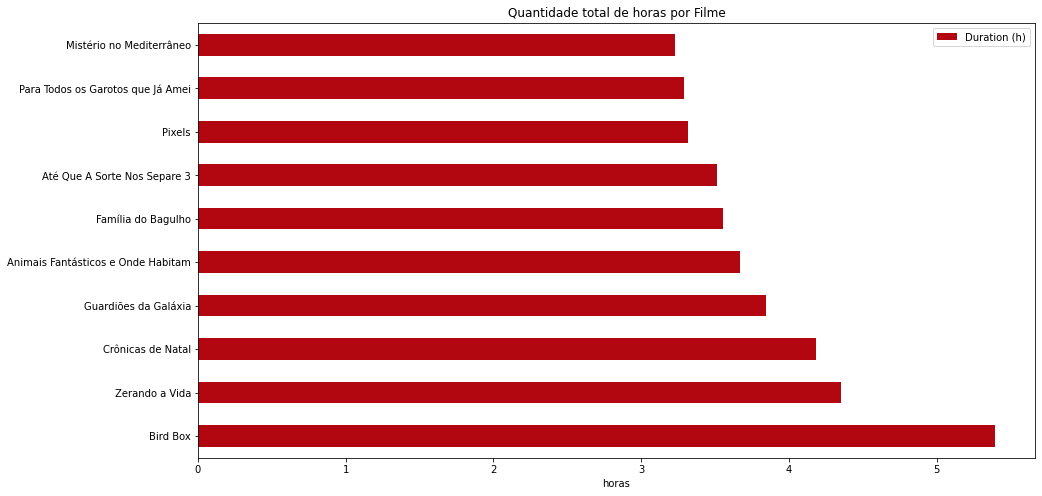

In [101]:
filme_assistidas_horas = data_netflix.loc[data_netflix['Type'] == 'Filme']
filme_assistidas_horas = filme_assistidas_horas.groupby(['Title Name']).agg({'Duration (h)':'sum'}).sort_values(by='Duration (h)',ascending=False).head(10)
filme_assistidas_horas.plot(kind='barh',color='#B20710')
plt.title("Quantidade total de horas por Filme")
plt.xlabel("horas")
plt.ylabel("")

In [103]:
# Episodio mais longo de uma serie q passei assistindo
episode_mais_longo = data_netflix[['Start Time','Title Name','Episode','Duration (h)']].loc[data_netflix['Type'] == 'Serie'].max()
episode_mais_longo

Start Time            2021-07-17 00:44:02-03:00
Title Name                            Yu-Gi-Oh!
Episode          Últimas palavras (Episódio 80)
Duration (h)                            1.09889
dtype: object

In [104]:
# Media que passo assistindo 1 episódio ( conta caso pare ou continue mais)
serie_media = data_netflix.loc[data_netflix['Type'] == 'Serie']
serie_media['Duration (h)'].sum()/len(serie_media)

0.20094022169437845

In [105]:
filme_mais_longo = data_netflix[['Start Time','Title Name','Duration (h)']].loc[data_netflix['Type'] == 'Filme'].max()
filme_mais_longo

Start Time      2021-07-10 12:30:48-03:00
Title Name                        É o fim
Duration (h)                      2.27833
dtype: object

In [106]:
df_history = df_history.loc[df_history['Profile Name'] == 'RAMON'].reset_index()

In [107]:
df_history.head()

,index,Profile Name,Country Iso Code,Device,Is Kids,Query Typed,Displayed Name,Action,Section,Utc Timestamp
0,109,RAMON,BR,Smart TV,0,nao,DIA DO SIM,play,video_info,2021-07-03 02:29:16
1,110,RAMON,BR,Smart TV,0,nao,DIA DO SIM,view_video_info,title_results,2021-07-03 02:28:58
2,111,RAMON,BR,Smart TV,0,at,Atypical,play,video_info,2021-05-29 03:18:13
3,112,RAMON,BR,Smart TV,0,at,Atypical,view_video_info,title_results,2021-05-29 03:18:03
4,113,RAMON,BR,Smart TV,0,code,Depois da Terra,view_video_info,title_results,2021-05-29 03:07:40


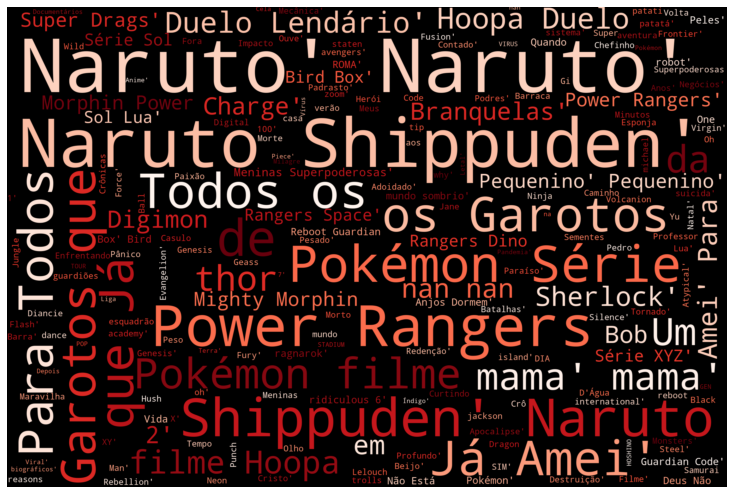

In [115]:
# Nuvem de palavras com as palavras mais buscadas 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = df_history['Displayed Name'].values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    colormap= 'Reds_r',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 20))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [117]:
df_history = df_history.drop(columns="index")

In [149]:
import zipfile 
from google.colab import files
data_netflix.to_csv('data_netflix.csv', index = None, header=True) 
files.download('data_netflix.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [119]:
import zipfile 
from google.colab import files
df_history.to_csv('df_history_netflix.csv', index = None, header=True) 
files.download('df_history_netflix.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>